In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
import numpy as np

In [5]:
X_train=np.loadtxt("C:\\Users\\akkim\\Desktop\\input.csv", delimiter = ",")
Y_train=np.loadtxt("C:\\Users\\akkim\\Desktop\\labels.csv", delimiter = ",")

X_test=np.loadtxt("C:\\Users\\akkim\\Desktop\\input_test.csv", delimiter = ",")
Y_test=np.loadtxt("C:\\Users\\akkim\\Desktop\\labels_test.csv",delimiter = ",")

In [7]:
print("Shape of X_train:" , X_train.shape)
print("Shape of Y_train:" , Y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_test:", Y_test.shape)


Shape of X_train: (2000, 30000)
Shape of Y_train: (2000,)
Shape of X_test: (400, 30000)
Shape of Y_test: (400,)


In [8]:
#need to reshape
X_train=X_train.reshape(len(X_train),100,100,3)
Y_train=Y_train.reshape(len(Y_train),1)

X_test=X_test.reshape(len(X_test),100,100,3)
Y_test=Y_test.reshape(len(Y_test),1)

In [9]:
print("Shape of X_train:" , X_train.shape)
print("Shape of Y_train:" , Y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_test:", Y_test.shape)

Shape of X_train: (2000, 100, 100, 3)
Shape of Y_train: (2000, 1)
Shape of X_test: (400, 100, 100, 3)
Shape of Y_test: (400, 1)


In [10]:
X_train[1,:]
#we see the numbers here range from 0-255 which is typical for rgb values lets revalue and divide all the numbers by 255

array([[[131., 128., 135.],
        [160., 157., 164.],
        [198., 192., 204.],
        ...,
        [250., 249., 247.],
        [255., 255., 253.],
        [250., 249., 245.]],

       [[140., 137., 144.],
        [127., 124., 131.],
        [120., 114., 124.],
        ...,
        [251., 253., 252.],
        [254., 255., 253.],
        [254., 255., 251.]],

       [[204., 202., 207.],
        [187., 185., 190.],
        [147., 142., 148.],
        ...,
        [249., 255., 255.],
        [238., 247., 242.],
        [232., 241., 236.]],

       ...,

       [[174., 182., 195.],
        [172., 180., 193.],
        [178., 186., 197.],
        ...,
        [ 87., 114.,  97.],
        [ 75.,  99.,  83.],
        [ 80., 105.,  86.]],

       [[166., 173., 189.],
        [164., 172., 185.],
        [172., 180., 193.],
        ...,
        [ 78., 106.,  84.],
        [ 72.,  97.,  76.],
        [ 77., 102.,  81.]],

       [[173., 180., 196.],
        [172., 179., 195.],
        [174., 1

In [11]:
X_train=X_train.reshape(len(X_train),100,100,3)
Y_train=Y_train.reshape(len(Y_train),1)

X_test=X_test.reshape(len(X_test),100,100,3)
Y_test=Y_test.reshape(len(Y_test),1)

X_train = X_train/255
X_test = X_test/255


In [12]:
X_train[1,:]

array([[[0.51372549, 0.50196078, 0.52941176],
        [0.62745098, 0.61568627, 0.64313725],
        [0.77647059, 0.75294118, 0.8       ],
        ...,
        [0.98039216, 0.97647059, 0.96862745],
        [1.        , 1.        , 0.99215686],
        [0.98039216, 0.97647059, 0.96078431]],

       [[0.54901961, 0.5372549 , 0.56470588],
        [0.49803922, 0.48627451, 0.51372549],
        [0.47058824, 0.44705882, 0.48627451],
        ...,
        [0.98431373, 0.99215686, 0.98823529],
        [0.99607843, 1.        , 0.99215686],
        [0.99607843, 1.        , 0.98431373]],

       [[0.8       , 0.79215686, 0.81176471],
        [0.73333333, 0.7254902 , 0.74509804],
        [0.57647059, 0.55686275, 0.58039216],
        ...,
        [0.97647059, 1.        , 1.        ],
        [0.93333333, 0.96862745, 0.94901961],
        [0.90980392, 0.94509804, 0.9254902 ]],

       ...,

       [[0.68235294, 0.71372549, 0.76470588],
        [0.6745098 , 0.70588235, 0.75686275],
        [0.69803922, 0

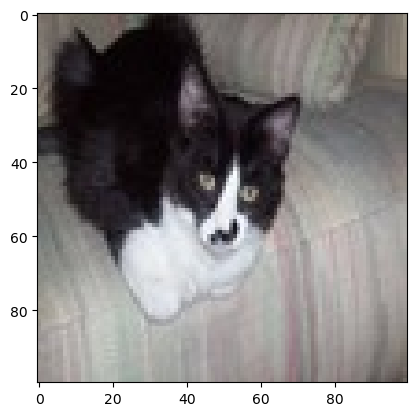

In [13]:
import matplotlib.pyplot as plt
import random
idx=random.randint(0,len(X_train))
plt.imshow(X_train[idx,:])
plt.show()


In [14]:
#TIME TO MODEL
model=Sequential([
    Conv2D(32,(3,3),activation="relu", input_shape=(100,100,3)),
    MaxPooling2D((2,2)),
    
    Conv2D(32,(3,3,), activation="relu"),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(64,activation="relu"),
    Dense(1,activation="sigmoid")
])

D:\anac\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [15]:
#another way
model=Sequential()

model.add(Conv2D(32,(3,3),activation="relu", input_shape=(100,100,3)))
model.add (MaxPooling2D((2,2)))

model.add(Conv2D(32,(3,3),activation="relu"))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [16]:
#diff loss functions are on keras wabsite api losses
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])


In [17]:
model.fit(X_train,Y_train,epochs=5,batch_size=64)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - accuracy: 0.5300 - loss: 0.7151
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - accuracy: 0.5769 - loss: 0.6657
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - accuracy: 0.7126 - loss: 0.5828
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.7354 - loss: 0.5287
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - accuracy: 0.7521 - loss: 0.5174


In [18]:
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])
model.fit(X_train,Y_train,epochs=5,batch_size=64)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - accuracy: 0.7711 - loss: 0.4765
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.8320 - loss: 0.3938
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - accuracy: 0.8157 - loss: 0.3958
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - accuracy: 0.8625 - loss: 0.3168
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.8964 - loss: 0.2728


In [19]:
model.evaluate(X_test,Y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7240 - loss: 0.6263


[0.5624694228172302, 0.7425000071525574]

In [20]:
model.evaluate(X_test,Y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7240 - loss: 0.6263


[0.5624694228172302, 0.7425000071525574]

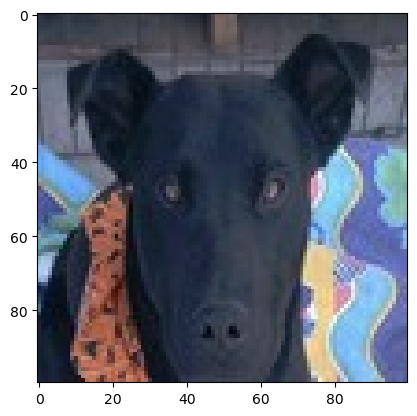

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Our Model says it is: dog


In [21]:
#MAKING PREDICTIONS FOR INDIVIDUAL
idx2=random.randint(0,len(Y_test))
plt.imshow(X_test[idx2,:])
plt.show()

y_pred=model.predict(X_test[idx2,:].reshape(1,100,100,3))
y_pred = y_pred>0.5

if(y_pred==0):
    pred="dog"
else:
    pred="cat"
print("Our Model says it is:", pred)